In [174]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Prepare DataSet of Gala

In [175]:
df_gala = pd.read_csv("../../../DataSet/Gala/gala.csv")
df_gala["Date"] = pd.to_datetime(df_gala["Date"], format="%d/%m/%Y")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Gala    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


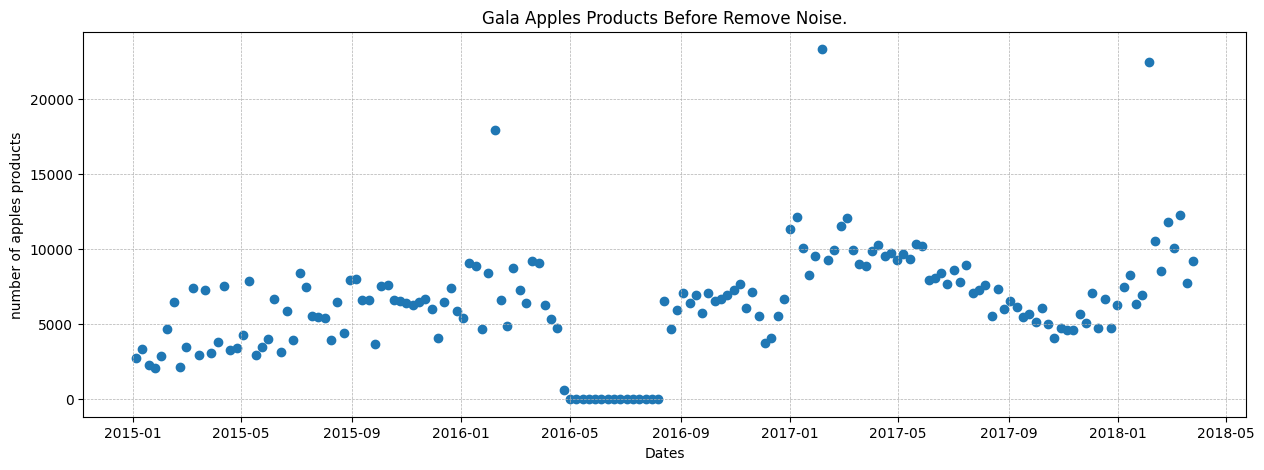

In [176]:
plt.figure(figsize=(15,5))
plt.title("Gala Apples Products Before Remove Noise.")
plt.xlabel("Dates")
plt.ylabel("number of apples products")
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

filter that number of apples are more than 1000 and less than 15000

In [177]:
df_gala = df_gala[df_gala["Gala"] <= 15000]
df_gala = df_gala[df_gala["Gala"] >= 1000]

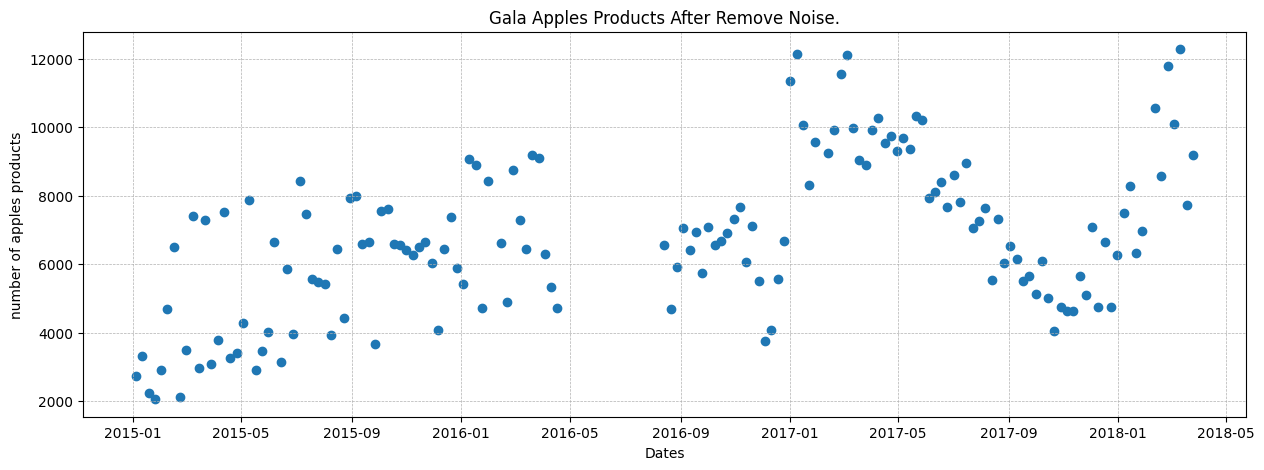

In [178]:
plt.figure(figsize=(15,5))
plt.title("Gala Apples Products After Remove Noise.")
plt.xlabel("Dates")
plt.ylabel("number of apples products")
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

predict next time by using previous time

In [179]:
df_gala["y"] = df_gala["Gala"].shift(-1)
df_gala.dropna(inplace=True)
df_gala["y"] = df_gala["y"].astype("int64")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    149 non-null    datetime64[ns]
 1   Gala    149 non-null    int64         
 2   y       149 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.7 KB


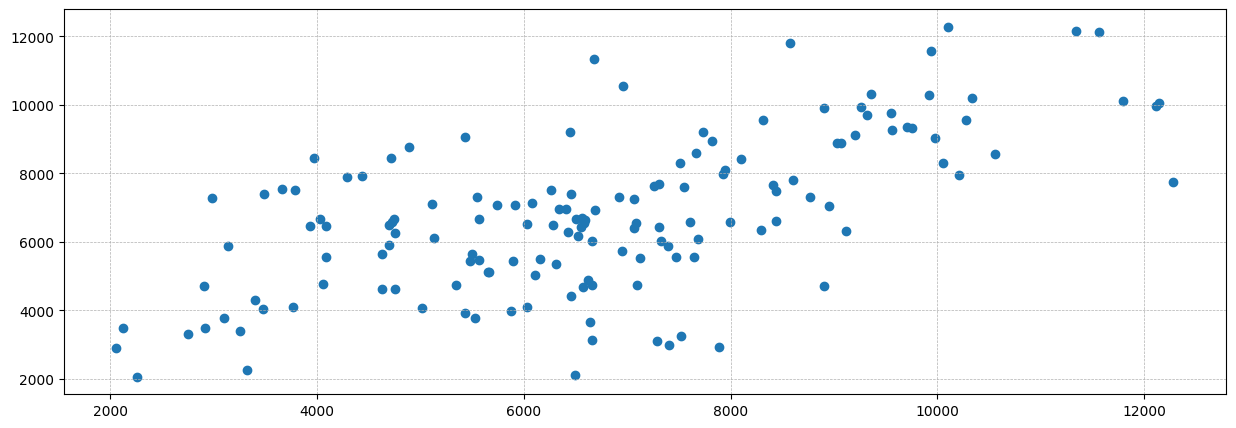

In [180]:
plt.figure(figsize=(15,5))
plt.grid(linestyle='--', linewidth='0.5')
plt.scatter(df_gala["Gala"], df_gala["y"])
plt.show()

In [181]:
x = np.array(df_gala.drop(columns="y"))
y = np.array(df_gala.drop(columns="Gala"))

# xScaler = StandardScaler().fit(x)
# yScaler = StandardScaler().fit(y)
# x = xScaler.transform(x)
# y = yScaler.transform(y)

In [182]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [183]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 1000000

    model = LinearRegression()
    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train, y_train)

        y_predict = model.predict(x_test)
        if (buff := mean_absolute_error(y_test, y_predict)) < a:
            a = buff
            random = _
    print(a, random)

# findBestRandomState(0, 10000, x[:, 1:], y[:, 1:])

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1667)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

### Train model of Gala apples

In [185]:
model = LinearRegression()
model.fit(x_train[:, 1:], y_train[:, 1:])

LinearRegression()

In [186]:
y_predict = model.predict(x_test[:, 1:])
mae = mean_absolute_error(y_test[:, 1:], y_predict)
mse = mean_squared_error(y_test[:, 1:], y_predict)
r2 = r2_score(y_test[:, 1:], y_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Baseline",mae,mse,r2,mape,"evaluate.csv")

Mean Absolute Error: 843.3033126369589
Mean Square Error: 1068842.1348000362
R2 score: 0.7036276906414216
Mean Absolute Percentage Error: 0.14002828177786597


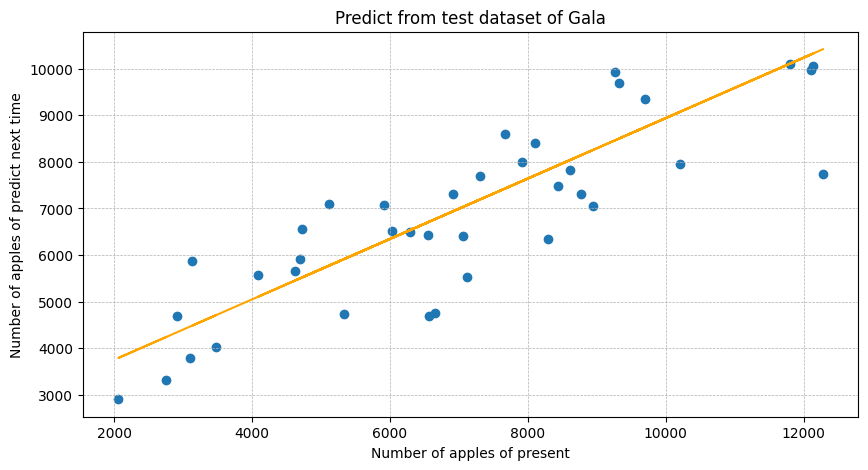

In [187]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Gala")
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

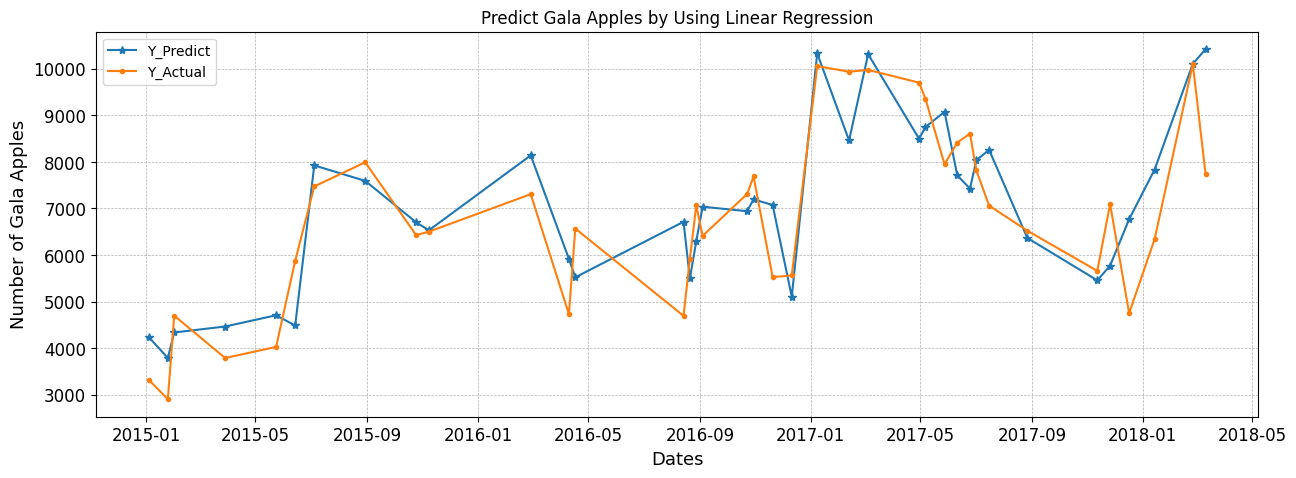

In [188]:
plt.figure(figsize=(15, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict", marker='*')
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker='.')
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Number of Gala Apples", fontsize=13)
plt.title("Predict Gala Apples by Using Linear Regression")
plt.grid(linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

---